In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/nguynnguynnht/netflix-titles-dataset/netflix_titles.csv


In [14]:
import pandas as pd

df = pd.read_csv("/kaggle/input/datasets/nguynnguynnht/netflix-titles-dataset/netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [15]:
df.shape

(6234, 12)

In [16]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
df["type"].value_counts()

type
Movie      4265
TV Show    1969
Name: count, dtype: int64

In [18]:
df["release_year"].value_counts().head(10)

release_year
2018    1063
2017     959
2019     843
2016     830
2015     517
2014     288
2013     237
2012     183
2010     149
2011     136
Name: count, dtype: int64

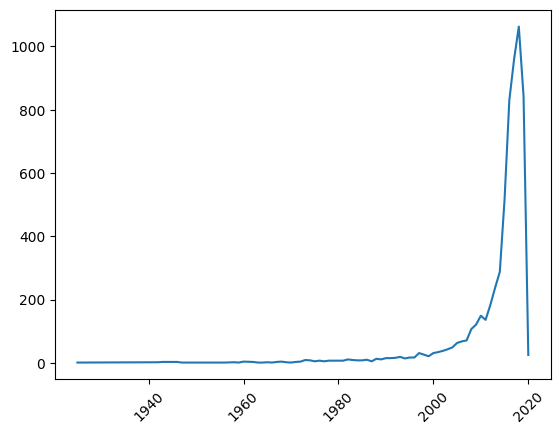

In [19]:
import matplotlib.pyplot as plt

year_counts = df["release_year"].value_counts().sort_index()

plt.figure()
plt.plot(year_counts.index, year_counts.values)
plt.xticks(rotation=45)
plt.show()

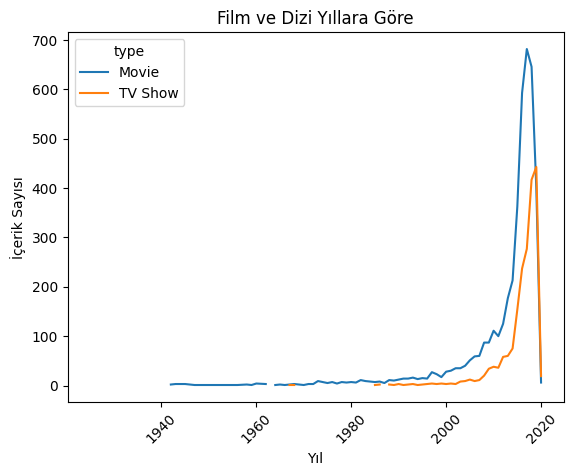

In [20]:
type_year = df.groupby(["release_year", "type"]).size().unstack()

type_year.plot()
plt.xticks(rotation=45)
plt.xlabel("Yıl")
plt.ylabel("İçerik Sayısı")
plt.title("Film ve Dizi Yıllara Göre")
plt.show()

In [21]:
df["country"].value_counts().head(10)

country
United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: count, dtype: int64

In [22]:
turkey_df = df[df["country"].str.contains("Turkey", na=False)]

turkey_df["release_year"].value_counts().sort_index()

release_year
2001     1
2004     2
2005     3
2006     1
2009     1
2010     5
2011     2
2012     3
2013    10
2014    14
2015    12
2016    12
2017     6
2018     6
2019     9
Name: count, dtype: int64

In [23]:
79 / 6234

0.012672441450112287

In [24]:
turkey_df["type"].value_counts()

type
Movie      62
TV Show    25
Name: count, dtype: int64

In [25]:
turkey_df["release_year"].mean()

np.float64(2014.0919540229886)

In [26]:
turkey_movies = turkey_df[turkey_df["type"] == "Movie"]

turkey_movies["duration"].head()

76     112 min
100    102 min
162    111 min
271    105 min
455    110 min
Name: duration, dtype: object

In [28]:
# Tüm filmleri filtrele
all_movies = df[df["type"] == "Movie"].copy()

# Süre temizleme
all_movies["duration_min"] = all_movies["duration"].str.replace(" min", "", regex=False)
all_movies["duration_min"] = all_movies["duration_min"].astype(int)

# Ortalama
all_movies["duration_min"].mean()

np.float64(99.10082063305978)